# Visualising the results from gridding the data & performing the LR analyis.

INPUT: 
 * /Volumes/GML001-Q1851/Brad/slideSeq/hipp_gridded_45-45_LR-CCI.h5ad

OUTPUT: 
 * plots/X5_slideSeq/*
 
## Environment Setup

In [1]:
# TODO change this to your directory
work_dir = '/Users/uqbbalde/Desktop/Uni_Studies/projects/stlearn_manuscript/mainfigCCI_newCCISupps/'

import os
os.chdir(work_dir)

import scanpy as sc
import matplotlib.pyplot as plt

import stlearn as st

import scripts.utils.visualisation.helpers as vhs

data_dir = '/Volumes/GML001-Q1851/Brad/slideSeq/'
out_dir = data_dir
out_plots = 'plots/X5_slideSeq/'

## Loading the data

In [4]:
grid_data = sc.read_h5ad(data_dir+'hipp_gridded_45-45_LR-CCI.h5ad')

## Visualising the results

In [11]:
# Reformatting names to correct format of mouse gene names #
grid_data_copy = grid_data.copy()
mouse_lrs = []
for lr in grid_data_copy.uns['lr_summary'].index:
    l, r = lr.split('_')
    l_ = l[0]+l[1:].lower()
    r_ = r[0]+r[1:].lower()
    lr = f'{l_}-{r_}'
    mouse_lrs.append( lr )
grid_data_copy.uns['lr_summary'].index = mouse_lrs

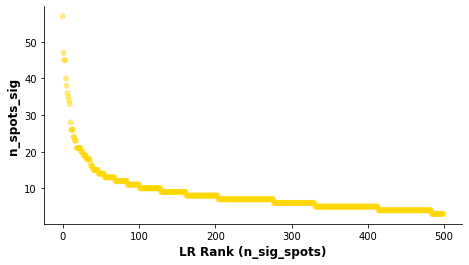

<Figure size 432x288 with 0 Axes>

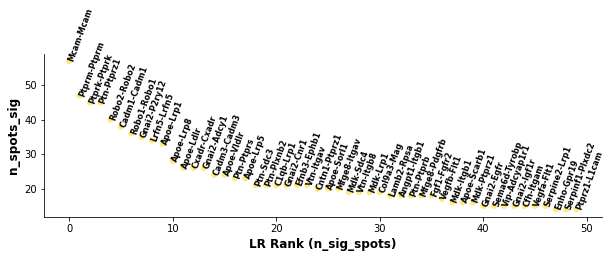

<Figure size 432x288 with 0 Axes>

In [12]:
st.pl.lr_summary(grid_data_copy, n_top=500)
vhs.dealWithPlot(True, True, True, out_plots, 'grid_lr_summary_all.pdf', 300)
st.pl.lr_summary(grid_data_copy, n_top=50, figsize=(10,3))
vhs.dealWithPlot(True, True, True, out_plots, 'grid_lr_summary_top.pdf', 300)

## Diagnostic plots

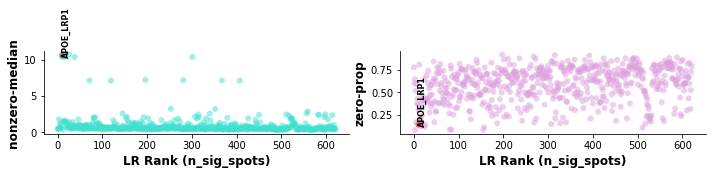

In [19]:
st.pl.lr_diagnostics(grid_data, figsize=(10,2.5), highlight_lrs=['APOE_LRP1'], show=False)
vhs.dealWithPlot(True, True, True, out_plots, 'grid_lr_expr_diags.pdf', 300)

## Looking at top LR from single cell analysis to see if results comparable

In [7]:
best_lr = 'APOE_LRP1'

/Users/uqbbalde/Desktop/Uni_Studies/myPython/stlearn_latest/stLearn/stlearn/plotting/classes.py:185: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, aspect=10, shrink=0.5, cmap=self.cmap,


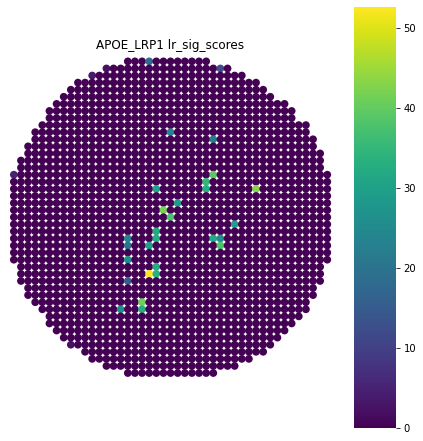

In [9]:
fig, ax = plt.subplots(figsize=(6,12))
st.pl.lr_result_plot(grid_data, use_result='lr_sig_scores', use_lr=best_lr, 
                     show_color_bar=True, 
                     #vmax=6, 
                     ax=ax, size=60, cmap='viridis')
ax.set_title(f'{best_lr} lr_sig_scores')
vhs.dealWithPlot(True, True, True, out_plots, f'grid_{best_lr}_lr_sig_scores.pdf', 300)